# Machine Learning: Loan Default Predictor

## **Introduction:**

In this project I will be using a loan data set to make predictions on whether a loan (with certain characteristics) will default.

I will train the following models:

- Logistic Regression: Baseline  model for performance comparison.
- Random Forest: Ensemble method known for its ability to handle complex data structures.
- Gradient Boosting Machine (GBM) OR XGBoost: Advanced ensemble tknown for their predictive ability.
- Neural Network (MLP): A method that uses interconnected nodes that process information and each different node connection has a different weight to resemble its importance to for the model. We will be using a specific class of a NN called MPL that has 3 layers and will find non-linear relationships
- StackingClassifier: A combined model that uses other models and creates one. Additionaly, the model auto tunes for you. Simple and easy way to make a machine learning model.



## Load Libraries:

In [1]:
#!pip uninstall scikit-learn --yes
#!pip install scikit-learn==1.2.2

In [2]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -- sklearn modules
from sklearn.model_selection import train_test_split    #- partition train/test split
from sklearn.ensemble import RandomForestClassifier     #- random forest classifier
from sklearn.ensemble import GradientBoostingClassifier #- GBM classfier
from sklearn.neural_network import MLPClassifier        #- multi-layer perceptron

# -- we need these to make our pipelines
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_curve, auc

# -- we need these to evaluate our models
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# -- need this to render charts in notebook --
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
# --
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# --
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler


/var/folders/t1/kp_skn19149_39v2tmch5vqm0000gn/T/ipykernel_44861/3718479978.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Load Data:

In [3]:
loan = pd.read_csv('https://raw.githubusercontent.com/MikeVej/ML_LoanDefaults/main/Loan%20Data/loan_train.csv')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501.0,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430.0,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1076863.0,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1069639.0,1304742.0,7000.0,7000.0,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1072053.0,1288686.0,3000.0,3000.0,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,Dec-2014,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


### Columns in data

In [4]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_rec_late_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [5]:
loan.loan_status.value_counts(normalize=True)

loan_status
current    0.849649
default    0.150351
Name: proportion, dtype: float64

In [6]:
loan_status_types = loan['loan_status'].unique()
print(loan_status_types)

['current' 'default']


## Exporatory Analysis

### Zips where default is > 30

In [7]:
# Zip codes where default counts is > 30
zip_df = loan.pivot_table(index='zip_code', columns='loan_status', aggfunc='size', fill_value=0)

df_postal_count = loan.groupby(['zip_code'])['loan_status'].count().to_frame()

postal_list = list(df_postal_count[df_postal_count['loan_status']>=30].index)

###  Graph: Top defaults by zip code

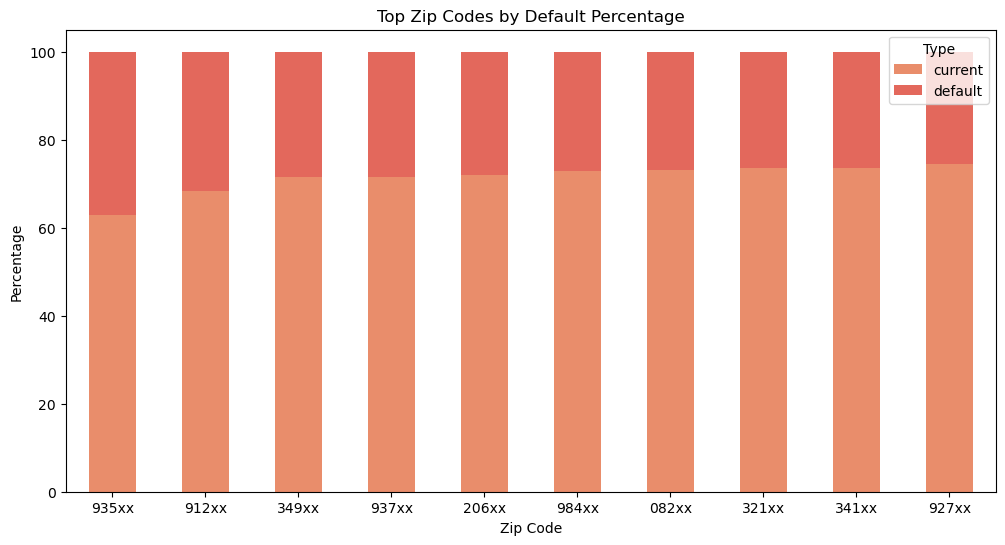

In [8]:
zip_df.reset_index()
# Calculate percentages
pivot_percentage = zip_df[['current', 'default']].div(zip_df[['current', 'default']].sum(axis=1), axis=0) * 100
pivot_percentage = pivot_percentage.sort_values('default',ascending=False)
df_viz = pivot_percentage[pivot_percentage.index.isin(postal_list)]
sns.set_palette("flare")
df_viz.head(10).plot(kind='bar', stacked=True, grid=False, figsize=(12, 6))
plt.title('Top Zip Codes by Default Percentage')
plt.xlabel('Zip Code')
plt.ylabel('Percentage')
plt.legend(title='Type')
plt.xticks(rotation=0)
plt.show()

### Graph: Top Defaults by emplyment length

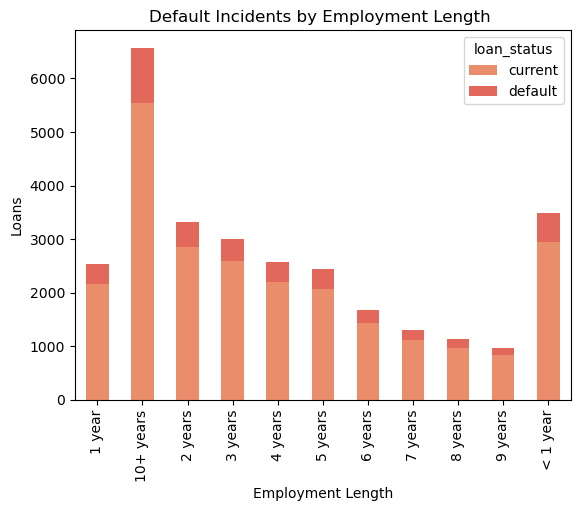

In [9]:
#Plot Fraud Incidents by years working
df_pivot = loan.pivot_table(index='emp_length', columns='loan_status', aggfunc='size', fill_value=0)
df_pivot.plot.bar(stacked=True, grid=False)
plt.xlabel('Employment Length')
plt.ylabel('Loans')
plt.title('Default Incidents by Employment Length ')
plt.show()

### Graph: Numeric Variable Distributions

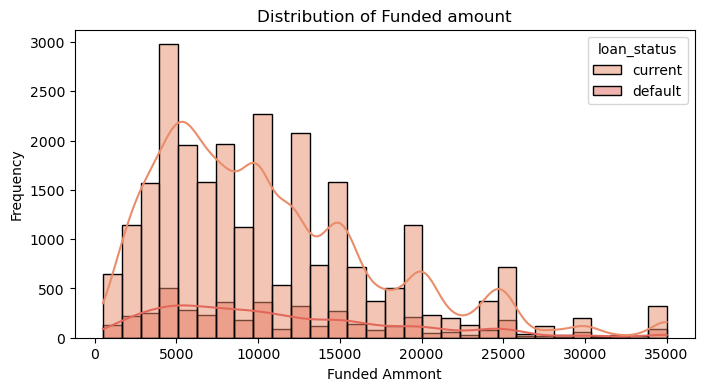

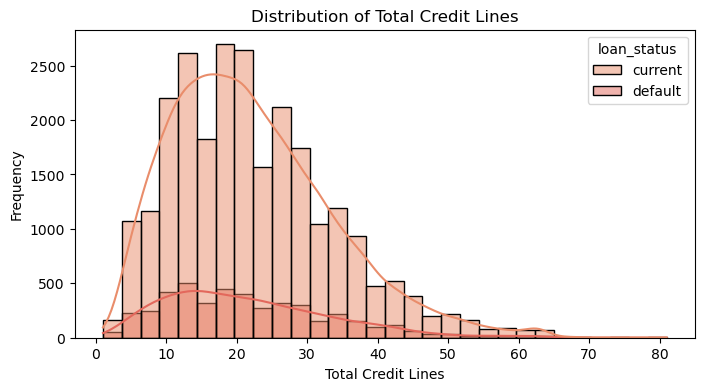

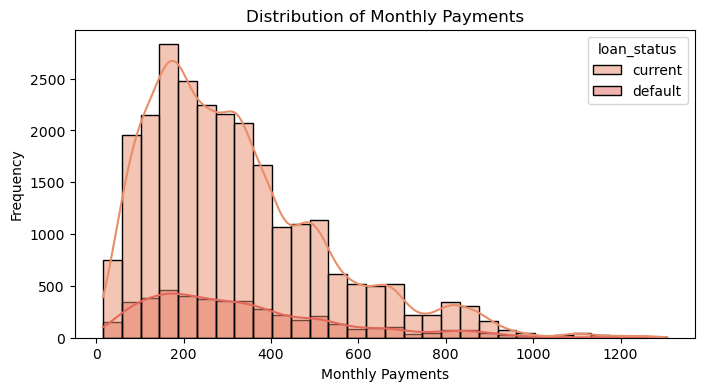

In [10]:
plt.figure(figsize=(8, 4))
sns.histplot(data= loan, x='funded_amnt', hue="loan_status", kde=True, bins=30)
plt.title(f'Distribution of Funded amount')
plt.xlabel('Funded Ammont')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(data= loan, x='total_acc', hue="loan_status", kde=True, bins=30)
plt.title(f'Distribution of Total Credit Lines')
plt.xlabel('Total Credit Lines')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(data= loan, x='installment', hue="loan_status", kde=True, bins=30)
plt.title(f'Distribution of Monthly Payments')
plt.xlabel('Monthly Payments')
plt.ylabel('Frequency')
plt.show()
    

## Data Prep:

### Identify features (Categorical/Numerical):

#### Describe Data:

##### Use this code to find feature warnings for feature selection (Un-comment to run tuning)

In [11]:
#def df_profile(df, target):

#    df = loan.copy()

#    numeric_features = [ c for c in df.select_dtypes(include = np.number).columns ]
#    pd.options.display.float_format = '{:.5f}'.format

#    categorical_features = [ c for c in df.select_dtypes(include = "object").columns ]

#    rowcnt = len(df)
#    df_s1  = df.agg(['count', 'nunique','mean','min','max']).transpose().reset_index().rename(columns={"index":"feature_name"}).round(4)
#    df_s1['count'] = df_s1['count'].astype('int64')
#    df_s1['nunique'] = df_s1['nunique'].astype('int64')
#    df_s1["null"] = (rowcnt - df_s1["count"]).astype('int64')
#    df_s1["not_null"] = rowcnt - df_s1["null"]
#    df_s1["null_pct"] = df_s1["null"] / rowcnt
#    df_s1["nunique_pct"] = df_s1['nunique'] / rowcnt


#    dt = pd.DataFrame(df.dtypes).reset_index().rename(columns={"index":"feature_name", 0:"dtype"})
#    df_stats = pd.merge(dt, df_s1, on='feature_name', how='inner')

#    df_stats = df_stats.sort_values("dtype").reset_index(drop=True)

#    df_stats['feature_type'] = "UNKNOWN"
#    df_stats.loc[np.logical_or(df_stats['dtype'] == int, df_stats['dtype'] == float), 'feature_type'] = "NUMERIC"
#    df_stats.loc[df_stats['dtype'] == object, 'feature_type'] = "CATEGORY"
#    df_stats.loc[df_stats['feature_name'] == target, 'feature_type'] = "TARGET"

#    df_stats['feature_warning'] = "NO WARNING"
#    df_stats.loc[df_stats['nunique_pct'] > 0.9, 'feature_warning'] = "EXCLUDE, GT 90% UNIQUE"
#    df_stats.loc[df_stats['null_pct'] > 0.2, 'feature_warning'] = "NULL WARNING, GT 20% MISSING"
#    df_stats.loc[df_stats['null_pct'] > 0.5, 'feature_warning'] = "EXCLUDE, GT 50% MISSING"
#    df_stats.loc[np.logical_and(np.logical_or(df_stats['dtype'] == int, df_stats['dtype'] == float), df_stats['nunique'] <= 20), 'feature_warning'] = "LIKELY CATEGORICAL, NUMERIC w. LOW CARDINALITY"

#    return df_stats

#dfp = df_profile(loan, 'loan_status')

#dfp

#### Unique Values in different columns:

In [12]:
loan_status_types = loan['emp_title'].unique()
print(loan_status_types)


[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'Town of Plainville' 'Tanks Tavern'
 'Halping hands company inc.']


In [13]:
loan['issue_d'].value_counts()

issue_d
Dec-2011    1581
Nov-2011    1568
Oct-2011    1467
Sep-2011    1453
Aug-2011    1359
Jul-2011    1279
Jun-2011    1240
May-2011    1181
Apr-2011    1081
Mar-2011    1001
Dec-2010     957
Jan-2011     941
Feb-2011     916
Oct-2010     857
Jul-2010     856
Nov-2010     847
Sep-2010     834
Aug-2010     825
Jun-2010     749
May-2010     701
Apr-2010     648
Mar-2010     616
Feb-2010     489
Jan-2010     475
Nov-2009     465
Dec-2009     448
Oct-2009     444
Sep-2009     355
Aug-2009     298
Jul-2009     288
Mar-2008     285
Jun-2009     276
May-2009     257
Apr-2009     243
Mar-2009     231
Jan-2008     229
Feb-2008     215
Feb-2009     206
Jan-2009     198
Apr-2008     184
Dec-2008     183
Nov-2008     152
Dec-2007     121
Jul-2008     105
Oct-2008      87
May-2008      84
Nov-2007      83
Jun-2008      82
Aug-2008      76
Oct-2007      73
Jul-2007      48
Aug-2007      43
Sep-2008      39
Sep-2007      36
Jun-2007      19
Name: count, dtype: int64

#### Clean Columns:

In [14]:
# Manually transform each column before putting in in pipeline for mean and frequency null filling

# pub_rec
loan['pub_rec'].fillna(0, inplace=True)
loan['pub_rec'].astype('category')
loan_uniques_pubr = loan['pub_rec'].unique()
print(loan_uniques_pubr)

# pub_rec_bankruptcies
loan['pub_rec_bankruptcies'].fillna(0, inplace=True)
loan['pub_rec_bankruptcies'].astype('category')
loan_uniques_pub_rec_bankruptcies = loan['pub_rec_bankruptcies'].unique()
print(loan_uniques_pub_rec_bankruptcies)

# pub_rec_bankruptcies
loan['acc_now_delinq'].fillna(0.0, inplace=True)
loan['acc_now_delinq'].astype('category')
loan_uniques_acc_now_delinq = loan['acc_now_delinq'].unique()
print(loan_uniques_acc_now_delinq)



[0. 1. 2. 3. 4. 5.]
[0. 1. 2.]
[0. 1.]


#### Split Features:

##### Numerical Features

In [15]:
#numeric_features =  dfp.query('feature_type == "NUMERIC"')['feature_name'].to_list()
#print(numeric_features)

In [16]:
numeric_features = ['fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'revol_bal', 
                    'total_acc', 'out_prncp_inv', 'total_rec_late_fee', 
                     'out_prncp', 'dti', 
                    'delinq_2yrs', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'annual_inc', 
                    'installment']


##### Categorical Features

In [17]:
#categorical_features = dfp.query('feature_type == "CATEGORY"')['feature_name'].to_list()
#print(categorical_features)

In [18]:
categorical_features = ['pub_rec', 'pub_rec_bankruptcies', 'acc_now_delinq', 'term', 'last_credit_pull_d', 'int_rate', 
                        'last_pymnt_d', 'grade', 'sub_grade', 'zip_code', 'revol_util', 'emp_length', 
                        'home_ownership', 'verification_status', 'issue_d', 
                        'earliest_cr_line', 'purpose', 'addr_state', 'title', 'emp_title']

#### Graph: Numerical Correlation Matrix

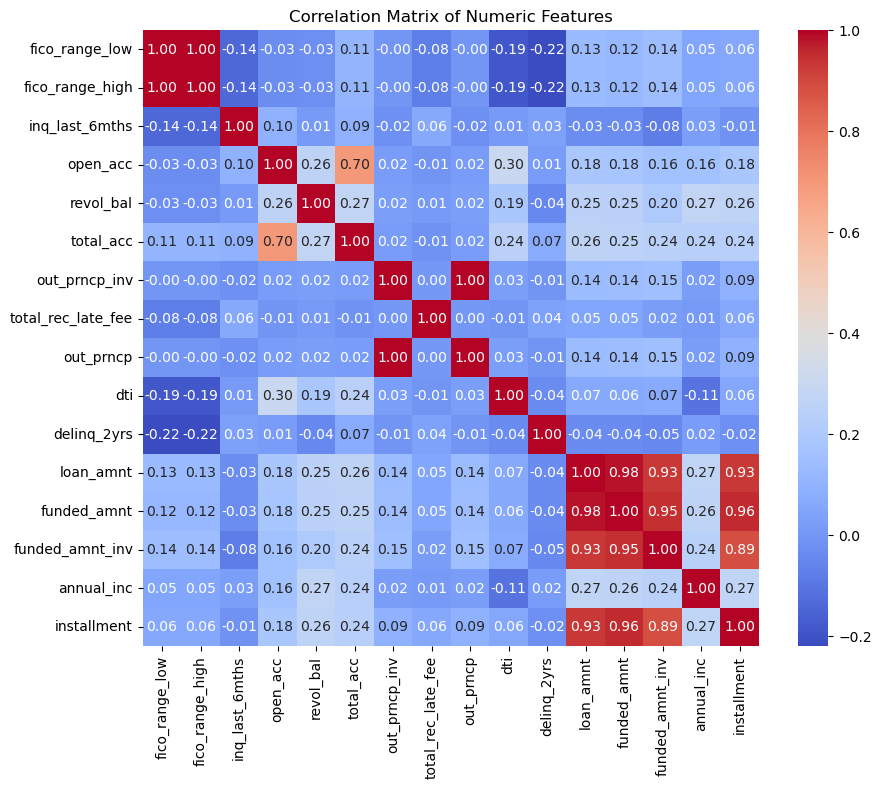

In [19]:
# Compute the correlation matrix
corr = loan[numeric_features].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

### Preprocess Cat./Num Columns

In [20]:
feature_names = categorical_features + numeric_features
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

### Loan status to binary [0,1]

In [21]:
# Define the target variable
y = loan['loan_status'].map({'current': 0, 'default': 1})  # Convert to binary
X = loan.drop('loan_status', axis=1)

### Train, Test, Split

In [22]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X[feature_names], y, test_size=0.3, random_state=0)

## Baseline Model - Logistic Reg:

#### LogReg Pipeline/Train

In [23]:
# Define the Logistic Regression pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=0, max_iter=300))])

# Train the Logistic Regression model
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths', 'open_acc',
                                                   'revol_bal', 'total_acc',
                                                   'out_prncp_inv',
                                                   'total_rec_late_fee',
                                                   'out_prncp', 'dti',
                                                   'delinq_2yrs', 'loan_amnt',
                                                   'funded_amnt',
                                                   'funded_amnt_inv',
                                                   'ann...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['pub_rec',
                                                   'pub_rec_bankruptcies',
                                                   'acc_now_delinq', 'term',
                                                   'last_credit_pull_d',
                                                   'int_rate', 'last_pymnt_d',
                                                   'grade', 'sub_grade',
                                                   'zip_code', 'revol_util',
                                                   'emp_length',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'issue_d',
                                                   'earliest_cr_line',
                                                   'purpose', 'addr_state',
                                                   'title', 'emp_title'])])),
                ('classifier',
                 LogisticRegression(max_iter=300, random_state=0))])

#### Create Model Predictions and Accuracy

In [24]:
# Predict and evaluate the model
lr_predictions = lr_pipeline.predict(X_test)
lr_pred_proba = lr_pipeline.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("Baseline Logistic Model Evaluation:")
print(f"  Accuracy: {accuracy_score(y_test, lr_predictions):.3f}")
print(f"  AUC: {roc_auc_score(y_test, lr_pred_proba):.3f}")
print(f"  Precision: {precision_score(y_test, lr_predictions):.3f}")
print(f"  F1 Score: {precision_score(y_test, lr_predictions):.3f}")
print(f"  Recall: {recall_score(y_test, lr_predictions):.3f}")

Baseline Logistic Model Evaluation:
  Accuracy: 0.898
  AUC: 0.919
  Precision: 0.693
  F1 Score: 0.693
  Recall: 0.565


## Model 1 - RandomForest:

#### Baseline RF:


##### Train Baseline Model

In [25]:
# Initialize the pipeline with the preprocessor and a Random Forest classifier
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100,
                                                                    max_depth=10,
                                                                    n_jobs=-1,
                                                                    random_state=42))])
# Train the pipeline
rf_pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths', 'open_acc',
                                                   'revol_bal', 'total_acc',
                                                   'out_prncp_inv',
                                                   'total_rec_late_fee',
                                                   'out_prncp', 'dti',
                                                   'delinq_2yrs', 'loan_amnt',
                                                   'funded_amnt',
                                                   'funded_amnt_inv',
                                                   'ann...
                                                  ['pub_rec',
                                                   'pub_rec_bankruptcies',
                                                   'acc_now_delinq', 'term',
                                                   'last_credit_pull_d',
                                                   'int_rate', 'last_pymnt_d',
                                                   'grade', 'sub_grade',
                                                   'zip_code', 'revol_util',
                                                   'emp_length',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'issue_d',
                                                   'earliest_cr_line',
                                                   'purpose', 'addr_state',
                                                   'title', 'emp_title'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_jobs=-1,
                                        random_state=42))])

In [26]:
# compare RF baseline model to Hyper Paramter Optimized model
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

print("Random Forest Baseline Evaluation:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"  AUC: {roc_auc_score(y_test, y_pred_proba_rf):.3f}")
print(f"  Precision: {precision_score(y_test, y_pred_rf):.3f}")
print(f"  F1 Score: {precision_score(y_test, y_pred_rf):.3f}")
print(f"  Recall: {recall_score(y_test, y_pred_rf):.3f}")

Random Forest Baseline Evaluation:
  Accuracy: 0.851
  AUC: 0.881
  Precision: 0.000
  F1 Score: 0.000
  Recall: 0.000


### Optimized Random Forest:

##### Finding best parameters

###### Un-comment to run tuning

In [27]:
# Create the parameter grid
param_grid = {
    'classifier__n_estimators': [30, 50, 100, 150],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [ 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, n_jobs=-1, scoring='roc_auc', verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best set of hyperparameters
best_params = grid_search.best_params_

# Print the best set of hyperparameters
print("Best parameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")

Fitting 3 folds for each of 72 candidates, totalling 216 fits


Best parameters:
  classifier__max_depth: None
  classifier__min_samples_leaf: 2
  classifier__min_samples_split: 5
  classifier__n_estimators: 150


##### Results of CV

In [28]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_depth,param_classifier__min_samples_leaf,param_classifier__min_samples_split,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,6.926889,0.091536,0.962073,0.089144,None,1,5,30,"{'classifier__max_depth': None, 'classifier__m...",0.888788,0.857281,0.874758,0.873609,0.012888,24
1,9.524622,0.128950,0.552803,0.028866,None,1,5,50,"{'classifier__max_depth': None, 'classifier__m...",0.897261,0.866897,0.887366,0.883842,0.012644,22
2,17.009786,0.632031,1.582087,0.252769,None,1,5,100,"{'classifier__max_depth': None, 'classifier__m...",0.903361,0.889425,0.893734,0.895507,0.005826,8
3,25.347037,0.801213,1.556333,0.242422,None,1,5,150,"{'classifier__max_depth': None, 'classifier__m...",0.906909,0.891512,0.895715,0.898045,0.006498,2
4,7.116851,0.255795,1.216472,0.192516,None,1,10,30,"{'classifier__max_depth': None, 'classifier__m...",0.892995,0.867352,0.880342,0.880230,0.010469,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2.233870,0.083182,0.367857,0.086385,10,4,5,150,"{'classifier__max_depth': 10, 'classifier__min...",0.892082,0.848497,0.867463,0.869347,0.017843,26
68,1.399120,0.145172,0.472237,0.026671,10,4,10,30,"{'classifier__max_depth': 10, 'classifier__min...",0.840520,0.837415,0.884357,0.854098,0.021434,41
69,1.251287,0.070135,0.401106,0.084288,10,4,10,50,"{'classifier__max_depth': 10, 'classifier__min...",0.845063,0.844693,0.864359,0.851372,0.009185,44
70,1.604087,0.067787,0.389841,0.076554,10,4,10,100,"{'classifier__max_depth': 10, 'classifier__min...",0.884393,0.837580,0.867310,0.863094,0.019342,30


##### Best Parameters

In [29]:
best_params

{'classifier__max_depth': None,
 'classifier__min_samples_leaf': 2,
 'classifier__min_samples_split': 5,
 'classifier__n_estimators': 150}

##### Refit with Best Parameters

In [30]:
# Initialize the pipeline with the preprocessor and a Random Forest classifier
rf_pipeline_hpo = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=150,
                                                                    min_samples_split=5,
                                                                    min_samples_leaf=2,
                                                                    max_depth = None,
                                                                    n_jobs=-1,
                                                                    random_state=42))])
# Train the pipeline
rf_pipeline_hpo.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths', 'open_acc',
                                                   'revol_bal', 'total_acc',
                                                   'out_prncp_inv',
                                                   'total_rec_late_fee',
                                                   'out_prncp', 'dti',
                                                   'delinq_2yrs', 'loan_amnt',
                                                   'funded_amnt',
                                                   'funded_amnt_inv',
                                                   'ann...
                                                   'acc_now_delinq', 'term',
                                                   'last_credit_pull_d',
                                                   'int_rate', 'last_pymnt_d',
                                                   'grade', 'sub_grade',
                                                   'zip_code', 'revol_util',
                                                   'emp_length',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'issue_d',
                                                   'earliest_cr_line',
                                                   'purpose', 'addr_state',
                                                   'title', 'emp_title'])])),
                ('classifier',
                 RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                                        n_estimators=150, n_jobs=-1,
                                        random_state=42))])

## Model 2 - (GBM):

#### Baseline GBM:

##### Train Baseline Model

In [31]:
# Initialize the pipeline with the preprocessor and a Random Forest classifier
gbm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier(
                                                                        learning_rate=0.1, 
                                                                        n_estimators=100,
                                                                        max_depth=10,
                                                                        min_samples_split=1.0,                         
                                                                        min_samples_leaf=0.5
                                                                    ))])
# Train the pipeline
gbm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths', 'open_acc',
                                                   'revol_bal', 'total_acc',
                                                   'out_prncp_inv',
                                                   'total_rec_late_fee',
                                                   'out_prncp', 'dti',
                                                   'delinq_2yrs', 'loan_amnt',
                                                   'funded_amnt',
                                                   'funded_amnt_inv',
                                                   'ann...
                                                   'pub_rec_bankruptcies',
                                                   'acc_now_delinq', 'term',
                                                   'last_credit_pull_d',
                                                   'int_rate', 'last_pymnt_d',
                                                   'grade', 'sub_grade',
                                                   'zip_code', 'revol_util',
                                                   'emp_length',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'issue_d',
                                                   'earliest_cr_line',
                                                   'purpose', 'addr_state',
                                                   'title', 'emp_title'])])),
                ('classifier',
                 GradientBoostingClassifier(max_depth=10, min_samples_leaf=0.5,
                                            min_samples_split=1.0))])

#### Optimized GBM:

##### Find best parameters

In [32]:
# Create the parameter grid
param_grid = {
    'classifier__n_estimators': [50, 100,150,200,250],
    'classifier__learning_rate': [0.01, 0.05, 0.1,.15, 0.2],
}

# More in-debth parameters
#param_grid = {
#    'classifier__n_estimators': [100,150,200,250],
#    'classifier__learning_rate': [0.05, 0.1,.15, 0.2],
#    'classifier__max_depth': [None, 1, 2, 3, 5, 10],
#    'classifier__min_samples_split': [0.1, 1.0, 10],
#    'classifier__min_samples_leaf': [0.1, 0.5, 1.0, 5]
#}


# Instantiate the GridSearchCV object
grid_search = GridSearchCV(gbm_pipeline, param_grid, cv=3, n_jobs=-1, scoring='roc_auc', verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best set of hyperparameters
best_params = grid_search.best_params_

# Print the best set of hyperparameters
print("Best parameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")

Fitting 3 folds for each of 25 candidates, totalling 75 fits


Best parameters:
  classifier__learning_rate: 0.05
  classifier__n_estimators: 100


##### Result of CV

In [33]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__learning_rate,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.567967,0.728576,0.189148,0.008441,0.01,50,"{'classifier__learning_rate': 0.01, 'classifie...",0.5,0.5,0.548766,0.516255,0.022989,20
1,2.513392,1.574510,0.201696,0.025080,0.01,100,"{'classifier__learning_rate': 0.01, 'classifie...",0.5,0.5,0.548766,0.516255,0.022989,20
2,3.664780,2.561151,0.219513,0.029937,0.01,150,"{'classifier__learning_rate': 0.01, 'classifie...",0.5,0.5,0.548766,0.516255,0.022989,20
3,5.083802,3.486598,0.230845,0.004795,0.01,200,"{'classifier__learning_rate': 0.01, 'classifie...",0.5,0.5,0.548766,0.516255,0.022989,20
4,6.223199,4.318848,0.234559,0.010503,0.01,250,"{'classifier__learning_rate': 0.01, 'classifie...",0.5,0.5,0.548766,0.516255,0.022989,20


##### Best parameters

In [59]:
best_params

{'classifier__learning_rate': 0.05, 'classifier__n_estimators': 100}

##### Refit Model w/ new Parameters

In [35]:
# Initialize the pipeline with the preprocessor and a Random Forest classifier
gbm_pipeline_hpo = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier(n_estimators=200,
                                                                    learning_rate=0.05,
                                                                    ))])
# Train the pipeline
gbm_pipeline_hpo.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths', 'open_acc',
                                                   'revol_bal', 'total_acc',
                                                   'out_prncp_inv',
                                                   'total_rec_late_fee',
                                                   'out_prncp', 'dti',
                                                   'delinq_2yrs', 'loan_amnt',
                                                   'funded_amnt',
                                                   'funded_amnt_inv',
                                                   'ann...
                                                  ['pub_rec',
                                                   'pub_rec_bankruptcies',
                                                   'acc_now_delinq', 'term',
                                                   'last_credit_pull_d',
                                                   'int_rate', 'last_pymnt_d',
                                                   'grade', 'sub_grade',
                                                   'zip_code', 'revol_util',
                                                   'emp_length',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'issue_d',
                                                   'earliest_cr_line',
                                                   'purpose', 'addr_state',
                                                   'title', 'emp_title'])])),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            n_estimators=200))])

## Model 3: Neutral Network (MLP)

### Baseline MLP:

#### Train MLP

In [62]:
# Define the Logistic Regression pipeline
mlp_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', MLPClassifier(hidden_layer_sizes=(50,10),
                                max_iter=1000,
                                alpha=1e-4,
                                solver='sgd',
                                verbose=0,
                                tol=1e-4,
                                learning_rate_init=.1,
                                random_state=42))
])

# Train the Logistic Regression model
mlp_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths', 'open_acc',
                                                   'revol_bal', 'total_acc',
                                                   'out_prncp_inv',
                                                   'total_rec_late_fee',
                                                   'out_prncp', 'dti',
                                                   'delinq_2yrs', 'loan_amnt',
                                                   'funded_amnt',
                                                   'funded_amnt_inv',
                                                   'ann...
                                                   'last_credit_pull_d',
                                                   'int_rate', 'last_pymnt_d',
                                                   'grade', 'sub_grade',
                                                   'zip_code', 'revol_util',
                                                   'emp_length',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'issue_d',
                                                   'earliest_cr_line',
                                                   'purpose', 'addr_state',
                                                   'title', 'emp_title'])])),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(50, 10),
                               learning_rate_init=0.1, max_iter=1000,
                               random_state=42, solver='sgd', verbose=0))])

#### Optimized MLP:

##### Find best parameters

In [63]:
# Create the parameter grid
param_grid = {
    'classifier__hidden_layer_sizes': [50, 100], # how many neurons
    'classifier__activation': ['relu, tanh'], # activation
    'classifier__alpha': [0.0001, 0.001]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(mlp_pipeline, param_grid, cv=3, n_jobs=-1, scoring='roc_auc', verbose=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best set of hyperparameters
best_params = grid_search.best_params_

# Print the best set of hyperparameters
print("Best parameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")

##### Result of CV

In [ ]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__learning_rate,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.13309,0.86733,0.21531,0.00582,0.01000,50,"{'classifier__learning_rate': 0.01, 'classifie...",0.50000,0.50000,0.54877,0.51626,0.02299,20
1,3.38835,1.64050,0.23085,0.00594,0.01000,100,"{'classifier__learning_rate': 0.01, 'classifie...",0.50000,0.50000,0.54877,0.51626,0.02299,20
2,4.60472,2.71134,0.26682,0.05421,0.01000,150,"{'classifier__learning_rate': 0.01, 'classifie...",0.50000,0.50000,0.54877,0.51626,0.02299,20
3,5.41639,4.07361,0.23385,0.01569,0.01000,200,"{'classifier__learning_rate': 0.01, 'classifie...",0.50000,0.50000,0.54877,0.51626,0.02299,20
4,6.50785,5.01636,0.23381,0.01274,0.01000,250,"{'classifier__learning_rate': 0.01, 'classifie...",0.50000,0.50000,0.54877,0.51626,0.02299,20


##### Best parameters

In [ ]:
best_params

{'classifier__learning_rate': 0.05, 'classifier__n_estimators': 100}

##### Refit Model w/ new Parameters

In [ ]:
# Define the Logistic Regression pipeline
mlp_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', MLPClassifier(hidden_layer_sizes=(50,10),
                                max_iter=1000,
                                alpha=1e-4,
                                solver='sgd',
                                verbose=0,
                                tol=1e-4,
                                learning_rate_init=.1,
                                random_state=42))
])

# Train the Logistic Regression model
mlp_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['fico_range_low',
                                                   'fico_range_high',
                                                   'inq_last_6mths', 'open_acc',
                                                   'revol_bal', 'total_acc',
                                                   'out_prncp_inv',
                                                   'total_rec_late_fee',
                                                   'out_prncp', 'dti',
                                                   'delinq_2yrs', 'loan_amnt',
                                                   'funded_amnt',
                                                   'funded_amnt_inv',
                                                   'ann...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['pub_rec',
                                                   'pub_rec_bankruptcies',
                                                   'acc_now_delinq', 'term',
                                                   'last_credit_pull_d',
                                                   'int_rate', 'last_pymnt_d',
                                                   'grade', 'sub_grade',
                                                   'zip_code', 'revol_util',
                                                   'emp_length',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'issue_d',
                                                   'earliest_cr_line',
                                                   'purpose', 'addr_state',
                                                   'title', 'emp_title'])])),
                ('classifier', GradientBoostingClassifier(learning_rate=0.5))])

## Model 4: AutoGluon

### Train AutoGluon

In [ ]:
time_limit = 180           # for quick demonstration only, you should set this to longest time you are willing to wait (in seconds)
metric = 'f1'              # specify your evaluation metric here


canidate_models = {
    'GBM': {},  # Use default hyperparameters for LightGBM
    'XGB': {},  # Use default hyperparameters for XGBoost
    'GBM': {},  # Use default hyperparameters for GradientBoosting
    'RF': {},  # Specify hyperparameters for Random Forest
    # Exclude models by not listing them, e.g., 'XGB', 'NN', and 'KNN' are not listed and thus excluded
}


# Initialize the TabularPredictor object.
glu_model = TabularPredictor(label='loan_status',
                             problem_type='binary',
                             eval_metric=metric)


# Fit the model.
"""
presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
"""
glu_model = glu_model.fit(X_train,
                          time_limit=time_limit,
                          hyperparameters=canidate_models,
                          presets='medium_quality', # switch to one of the above presets.
                          )

No path specified. Models will be saved in: "AutogluonModels/ag-20240307_201801"
Presets specified: ['medium_quality']


KeyError: "Label column 'loan_status' is missing from training data. Training data columns: ['pub_rec', 'pub_rec_bankruptcies', 'acc_now_delinq', 'term', 'last_credit_pull_d', 'int_rate', 'last_pymnt_d', 'grade', 'sub_grade', 'zip_code', 'revol_util', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'earliest_cr_line', 'purpose', 'addr_state', 'title', 'emp_title', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'revol_bal', 'total_acc', 'out_prncp_inv', 'total_rec_late_fee', 'out_prncp', 'dti', 'delinq_2yrs', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'annual_inc', 'installment']"

## Model Performance (All Models):

### Logistic (Baseline):

In [41]:
# Evaluate baseline model
lr_predictions = lr_pipeline.predict(X_test)
lr_pred_proba = lr_pipeline.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("Baseline Logistic Model Evaluation:")
print(f"  Accuracy: {accuracy_score(y_test, lr_predictions):.3f}")
print(f"  AUC: {roc_auc_score(y_test, lr_pred_proba):.3f}")
print(f"  Precision: {precision_score(y_test, lr_predictions):.3f}")
print(f"  F1 Score: {precision_score(y_test, lr_predictions):.3f}")
print(f"  Recall: {recall_score(y_test, lr_predictions):.3f}")

Baseline Logistic Model Evaluation:
  Accuracy: 0.898
  AUC: 0.919
  Precision: 0.693
  F1 Score: 0.693
  Recall: 0.565


### Random Forest (Baseline/Tuned)

In [40]:
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

y_pred_rf_hpo = rf_pipeline_hpo.predict(X_test)
y_pred_proba_rf_hpo = rf_pipeline_hpo.predict_proba(X_test)[:, 1]

print("Random Forest Baseline Evaluation:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"  AUC: {roc_auc_score(y_test, y_pred_proba_rf):.3f}")
print(f"  Precision: {precision_score(y_test, y_pred_rf):.3f}")
print(f"  F1 Score: {precision_score(y_test, y_pred_rf):.3f}")
print(f"  Recall: {recall_score(y_test, y_pred_rf):.3f}")

print("\n -------- ")
print("Random Forest Optimized Evaluation:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_rf_hpo):.4f}")
print(f"  AUC: {roc_auc_score(y_test, y_pred_proba_rf_hpo):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_rf_hpo):.4f}")
print(f"  F1 Score: {precision_score(y_test, y_pred_rf_hpo):.3f}")
print(f"  Recall: {recall_score(y_test, y_pred_rf_hpo):.3f}")

Random Forest Baseline Evaluation:
  Accuracy: 0.851
  AUC: 0.881
  Precision: 0.000
  F1 Score: 0.000
  Recall: 0.000

 -------- 
Random Forest Optimized Evaluation:
  Accuracy: 0.8509
  AUC: 0.8920
  Precision: 0.0000
  F1 Score: 0.000
  Recall: 0.000


### GBM (Baseline/Optimized)

In [39]:
# compare GBM baseline model to Hyper Paramter Optimized model
y_pred_gbm  = gbm_pipeline.predict(X_test)
y_pred_proba_gbm = gbm_pipeline.predict_proba(X_test)[:, 1]

y_pred_gbm_hpo  = gbm_pipeline_hpo.predict(X_test)
y_pred_proba_gbm_hpo = gbm_pipeline_hpo.predict_proba(X_test)[:, 1]

print("\n -------- ")
print("GBM Baseline Evaluation:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_gbm):.3f}")
print(f"  AUC: {roc_auc_score(y_test, y_pred_proba_gbm):.3f}")
print(f"  Precision: {precision_score(y_test, y_pred_gbm):.3f}")
print(f"  F1 Score: {precision_score(y_test, y_pred_gbm):.3f}")
print(f"  Recall: {recall_score(y_test, y_pred_gbm):.3f}")

print("\n -------- ")
print("GBM Optimized Evaluation:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_gbm_hpo):.3f}")
print(f"  AUC: {roc_auc_score(y_test, y_pred_proba_gbm_hpo):.3f}")
print(f"  Precision: {precision_score(y_test, y_pred_gbm_hpo):.3f}")
print(f"  F1 Score: {precision_score(y_test, y_pred_gbm_hpo):.3f}")
print(f"  Recall: {recall_score(y_test, y_pred_gbm_hpo):.3f}")


 -------- 
GBM Baseline Evaluation:
  Accuracy: 0.851
  AUC: 0.500
  Precision: 0.000
  F1 Score: 0.000
  Recall: 0.000

 -------- 
GBM Optimized Evaluation:
  Accuracy: 0.887
  AUC: 0.916
  Precision: 0.718
  F1 Score: 0.718
  Recall: 0.393


# Problems: Random forest Precision, F1, and recall are all 0
# what parameters can i put for the mlp